CSCI 611 Final Project<br>
Shelley Wong, Nomaan Faiyaz Shaikh, Padam Rana<br>
May 2020

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import folium
from folium import plugins
 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# get time series data for Daily Close Stock Prices 
# Focusing on market sectors to see which sectors of the economy have been most
# affected by COVID-19
df = pd.read_csv(
  '/content/drive/My Drive/CSCI611-Covid19-Project/MarketSectors-2020-05-01.csv'
)

df.head()
#/content/drive/My Drive/CSCI611-Covid19-Project/

,Unnamed: 0,.DJI,Unnamed: 2,.IXIC,Unnamed: 4,.INX,Unnamed: 6,AMZN,Unnamed: 8,FB,Unnamed: 10,GOOGL,Unnamed: 12,NFLX,Unnamed: 14,XLY,Unnamed: 16,XLE,Unnamed: 18,XLI,Unnamed: 20,XLF,Unnamed: 22,XLV,Unnamed: 24,XLK,Unnamed: 26,XLU,Unnamed: 28,XLP,Unnamed: 30,XLB,Unnamed: 32,XOP
0,NaN,DowJones,NaN,NASDAQ,NaN,S&P500,NaN,Amazon,NaN,Facebook,NaN,Google,NaN,Netflix,NaN,ConsumerDiscretionary,NaN,Energy,NaN,Industrials,NaN,Financials,NaN,HealthCare,NaN,Technology,NaN,Utilities,NaN,ConsumerStaples,NaN,Materials,NaN,OilAndGas
1,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close
2,1/2/2020 16:00:00,28868.8,1/2/2020 16:00:00,9092.19,1/2/2020 16:00:00,3257.85,1/2/2020 16:00:00,1898.01,1/2/2020 16:00:00,209.78,1/2/2020 16:00:00,1368.68,1/2/2020 16:00:00,329.81,1/2/2020 16:00:00,126.91,1/2/2020 16:00:00,60.58,1/2/2020 16:00:00,83.01,1/2/2020 16:00:00,31.08,1/2/2020 16:00:00,102.13,1/2/2020 16:00:00,93.39,1/2/2020 16:00:00,63.81,1/2/2020 16:00:00,62.48,1/2/2020 16:00:00,60.7,1/2/2020 16:00:00,94.64
3,1/3/2020 16:00:00,28634.88,1/3/2020 16:00:00,9020.77,1/3/2020 16:00:00,3234.85,1/3/2020 16:00:00,1874.97,1/3/2020 16:00:00,208.67,1/3/2020 16:00:00,1361.52,1/3/2020 16:00:00,325.9,1/3/2020 16:00:00,125.83,1/3/2020 16:00:00,60.4,1/3/2020 16:00:00,82.85,1/3/2020 16:00:00,30.75,1/3/2020 16:00:00,101.24,1/3/2020 16:00:00,92.34,1/3/2020 16:00:00,63.94,1/3/2020 16:00:00,62.38,1/3/2020 16:00:00,59.72,1/3/2020 16:00:00,96.12
4,1/6/2020 16:00:00,28703.38,1/6/2020 16:00:00,9071.47,1/6/2020 16:00:00,3246.28,1/6/2020 16:00:00,1902.88,1/6/2020 16:00:00,212.6,1/6/2020 16:00:00,1397.81,1/6/2020 16:00:00,335.83,1/6/2020 16:00:00,126.18,1/6/2020 16:00:00,60.87,1/6/2020 16:00:00,82.88,1/6/2020 16:00:00,30.73,1/6/2020 16:00:00,101.87,1/6/2020 16:00:00,92.56,1/6/2020 16:00:00,64,1/6/2020 16:00:00,62.51,1/6/2020 16:00:00,59.46,1/6/2020 16:00:00,96.76


In [ ]:
# Get info about this dataframe. 
# Since Dtype is object, we need to make the values for closing prices numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   84 non-null     object
 1   .DJI         85 non-null     object
 2   Unnamed: 2   84 non-null     object
 3   .IXIC        85 non-null     object
 4   Unnamed: 4   84 non-null     object
 5   .INX         85 non-null     object
 6   Unnamed: 6   84 non-null     object
 7   AMZN         85 non-null     object
 8   Unnamed: 8   84 non-null     object
 9   FB           85 non-null     object
 10  Unnamed: 10  84 non-null     object
 11  GOOGL        85 non-null     object
 12  Unnamed: 12  84 non-null     object
 13  NFLX         85 non-null     object
 14  Unnamed: 14  84 non-null     object
 15  XLY          85 non-null     object
 16  Unnamed: 16  84 non-null     object
 17  XLE          85 non-null     object
 18  Unnamed: 18  84 non-null     object
 19  XLI          85 non-null     ob

In [ ]:
# Drop unneeded date columns
df.drop(['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 10', 
         'Unnamed: 12', 'Unnamed: 14', 'Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20',
         'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26', 'Unnamed: 28', 'Unnamed: 30',
         'Unnamed: 32'], axis = 1, inplace = True)
df.head()

,Unnamed: 0,.DJI,.IXIC,.INX,AMZN,FB,GOOGL,NFLX,XLY,XLE,XLI,XLF,XLV,XLK,XLU,XLP,XLB,XOP
0,NaN,DowJones,NASDAQ,S&P500,Amazon,Facebook,Google,Netflix,ConsumerDiscretionary,Energy,Industrials,Financials,HealthCare,Technology,Utilities,ConsumerStaples,Materials,OilAndGas
1,Date,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
2,1/2/2020 16:00:00,28868.8,9092.19,3257.85,1898.01,209.78,1368.68,329.81,126.91,60.58,83.01,31.08,102.13,93.39,63.81,62.48,60.7,94.64
3,1/3/2020 16:00:00,28634.88,9020.77,3234.85,1874.97,208.67,1361.52,325.9,125.83,60.4,82.85,30.75,101.24,92.34,63.94,62.38,59.72,96.12
4,1/6/2020 16:00:00,28703.38,9071.47,3246.28,1902.88,212.6,1397.81,335.83,126.18,60.87,82.88,30.73,101.87,92.56,64,62.51,59.46,96.76


In [ ]:
# Change date column name to 'Date'
df.rename(columns = {'Unnamed: 0':'Date'}, inplace = True) 
df.head(3)

,Date,.DJI,.IXIC,.INX,AMZN,FB,GOOGL,NFLX,XLY,XLE,XLI,XLF,XLV,XLK,XLU,XLP,XLB,XOP
0,NaN,DowJones,NASDAQ,S&P500,Amazon,Facebook,Google,Netflix,ConsumerDiscretionary,Energy,Industrials,Financials,HealthCare,Technology,Utilities,ConsumerStaples,Materials,OilAndGas
1,Date,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
2,1/2/2020 16:00:00,28868.8,9092.19,3257.85,1898.01,209.78,1368.68,329.81,126.91,60.58,83.01,31.08,102.13,93.39,63.81,62.48,60.7,94.64


In [ ]:
# Use Stock Symbol to identify columns
# (remove full name and "Close" heading)
df = df[2:]
df.head(3)

,Date,.DJI,.IXIC,.INX,AMZN,FB,GOOGL,NFLX,XLY,XLE,XLI,XLF,XLV,XLK,XLU,XLP,XLB,XOP
2,1/2/2020 16:00:00,28868.8,9092.19,3257.85,1898.01,209.78,1368.68,329.81,126.91,60.58,83.01,31.08,102.13,93.39,63.81,62.48,60.7,94.64
3,1/3/2020 16:00:00,28634.88,9020.77,3234.85,1874.97,208.67,1361.52,325.9,125.83,60.4,82.85,30.75,101.24,92.34,63.94,62.38,59.72,96.12
4,1/6/2020 16:00:00,28703.38,9071.47,3246.28,1902.88,212.6,1397.81,335.83,126.18,60.87,82.88,30.73,101.87,92.56,64,62.51,59.46,96.76


In [ ]:
# Change 'Date' column to %Y-%m-%d format
import datetime as dt
from datetime import timedelta, date
dates = []

for row in df["Date"]: 
  dates.append(dt.datetime.strptime(row, "%m/%d/%Y %H:%M:%S").strftime("%Y-%m-%d"))
  
df['Date'] = dates
df.head()

,Date,.DJI,.IXIC,.INX,AMZN,FB,GOOGL,NFLX,XLY,XLE,XLI,XLF,XLV,XLK,XLU,XLP,XLB,XOP
2,2020-01-02,28868.8,9092.19,3257.85,1898.01,209.78,1368.68,329.81,126.91,60.58,83.01,31.08,102.13,93.39,63.81,62.48,60.7,94.64
3,2020-01-03,28634.88,9020.77,3234.85,1874.97,208.67,1361.52,325.9,125.83,60.4,82.85,30.75,101.24,92.34,63.94,62.38,59.72,96.12
4,2020-01-06,28703.38,9071.47,3246.28,1902.88,212.6,1397.81,335.83,126.18,60.87,82.88,30.73,101.87,92.56,64,62.51,59.46,96.76
5,2020-01-07,28583.68,9068.58,3237.18,1906.86,213.06,1395.11,330.75,125.98,60.71,82.71,30.53,101.67,92.52,63.91,62.03,59.39,97.92
6,2020-01-08,28745.09,9129.24,3253.05,1891.97,215.22,1405.04,339.26,126.36,59.71,82.99,30.73,102.33,93.51,63.88,62.26,59.6,94.2


In [ ]:
# Make a copy of the dataframe with 'Date' as the index
df_copy = df.set_index('Date')
df_copy.head(3)

,.DJI,.IXIC,.INX,AMZN,FB,GOOGL,NFLX,XLY,XLE,XLI,XLF,XLV,XLK,XLU,XLP,XLB,XOP
Date,,,,,,,,,,,,,,,,,
2020-01-02,28868.8,9092.19,3257.85,1898.01,209.78,1368.68,329.81,126.91,60.58,83.01,31.08,102.13,93.39,63.81,62.48,60.7,94.64
2020-01-03,28634.88,9020.77,3234.85,1874.97,208.67,1361.52,325.9,125.83,60.4,82.85,30.75,101.24,92.34,63.94,62.38,59.72,96.12
2020-01-06,28703.38,9071.47,3246.28,1902.88,212.6,1397.81,335.83,126.18,60.87,82.88,30.73,101.87,92.56,64,62.51,59.46,96.76


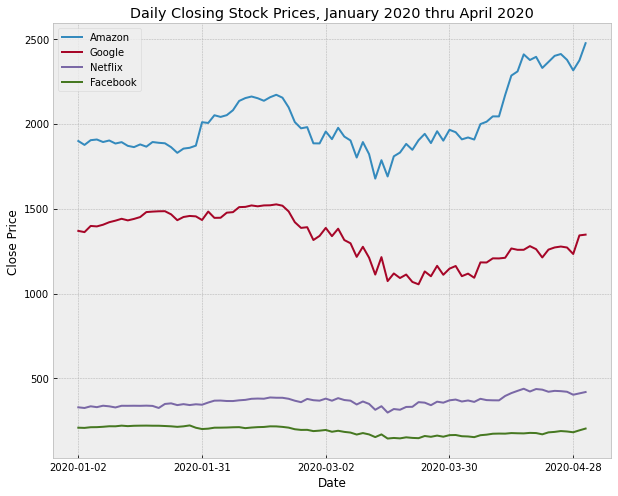

In [ ]:
# Plot closing stock prices of major companies
# We weren't sure which stocks would be most interesting to examine, but after 
# looking at a number of companies, and sectors, decided the sectors would make
# for more interesting analysis about the effect of COVID-19
plt.figure(figsize = (10,8))
plt.style.use('bmh')

row = pd.to_numeric(df_copy["AMZN"], errors='coerce')
row2 = pd.to_numeric(df_copy["GOOGL"], errors='coerce')
row3 = pd.to_numeric(df_copy["NFLX"], errors='coerce')
row4 = pd.to_numeric(df_copy["FB"], errors='coerce')

plt.ylabel('Close Price')
plt.xlabel('Number of Days from First Travel-related case of Coronavirus infection')
plt.title('Daily Closing Stock Prices, January 2020 thru April 2020')
row.plot(label='Amazon')
row2.plot(label='Google')
row3.plot(label='Netflix')
row4.plot(label='Facebook')

plt.legend()
plt.show()

In [ ]:
# Use go.Figure() to make a line graph comparing closing stock prices for market sectors
labels = ["Energy", "HealthCare", "OilAndGas", "Financials", 
          "Technology", "ConsumerStaples", "ConsumerDiscretionary", 
          "Industrials", "Utilities", "Materials"]
colors = ['pink', 'red', 'orange', 'gold', 'green',
          'teal', 'blue', 'purple', 'brown', 'gray']
mode_size = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
line_size = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLE"], errors='coerce'), 
                         name=labels[0],mode="lines", connectgaps=True,
                         line= dict(color = colors[0], width=line_size[0])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLV"], errors='coerce'), 
                         name=labels[1], mode="lines", connectgaps=True,
                         line= dict(color = colors[1], width=line_size[1])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XOP"], errors='coerce'), 
                         name=labels[2], mode="lines", connectgaps=True,
                         line= dict(color = colors[2], width=line_size[2])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLF"], errors='coerce'), 
                         name=labels[3],mode="lines", connectgaps=True,
                         line= dict(color = colors[3], width=line_size[3])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLK"], errors='coerce'), 
                         name=labels[4], mode="lines", connectgaps=True,
                         line= dict(color = colors[4], width=line_size[4])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLP"], errors='coerce'), 
                         name=labels[5], mode="lines", connectgaps=True,
                         line= dict(color = colors[5], width=line_size[5])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLY"], errors='coerce'), 
                         name=labels[6], mode="lines", connectgaps=True,
                         line= dict(color = colors[6], width=line_size[6])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLI"], errors='coerce'), 
                         name=labels[7], mode="lines", connectgaps=True,
                         line= dict(color = colors[7], width=line_size[7])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLU"], errors='coerce'), 
                         name=labels[8], mode="lines", connectgaps=True,
                         line= dict(color = colors[8], width=line_size[8])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLB"], errors='coerce'), 
                         name=labels[9], mode="lines", connectgaps=True,
                         line= dict(color = colors[9], width=line_size[9])))

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_copy.index,
        title_text="Dates"
    ),
    title_text="Closing Stock Prices of Market Sectors",
    paper_bgcolor="LightSteelBlue",
    yaxis=dict(title_text="Stock Prices from January to April"),
)
# Interactive graph - can see closing stock prices on each day, for each sector
# click on sectors in the legend to examine individual graphs  
fig.show()

In [ ]:
# get time series data for Confirmed Cases (by Country)
cases = pd.read_csv(
  '/content/drive/My Drive/CSCI611-Covid19-Project/time_series_covid19_confirmed_global.csv'
)
cases.head()
#/content/drive/My Drive/CSCI611-Covid19-Project/

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


In [ ]:
# Drop columns that don't contain number of cases/date
cases.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)
cases.head(3)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006


In [ ]:
# Group by and sum Country/Region (combine Province/State for one Country)
cases = cases.groupby(["Country/Region"], axis=0).sum()
cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


In [ ]:
# Make a copy of 'cases' to save a subset of the data from various countries
subset = cases
cases_t = cases.transpose()
subset_t = subset.transpose()
cases_t['US']

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
4/26/20     965785
4/27/20     988197
4/28/20    1012582
4/29/20    1039909
4/30/20    1069424
Name: US, Length: 100, dtype: int64

In [ ]:
# Change dates to %Y-%m-%d format
cases_t.index = pd.to_datetime(cases_t.index)
subset_t.index = pd.to_datetime(subset_t.index)
subset_t.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0


In [ ]:
# Find US cases by population (# of cases per 1 million people)
us_cases_per_pop = []
us_pop = 328200000  # 2019 population according to US Census Bureau, Eurostat

for row in cases_t['US']: 
  us_cases_per_pop.append(row/us_pop*1000000)

#us_cases_per_pop  #Uncomment to see values

In [ ]:
# Find Italy cases by population (# of cases per 1 million people)
italy_cases_per_pop = []
italy_pop = 60360000  # 2019 population according to Eurostat

for row in cases_t["Italy"]: 
  italy_cases_per_pop.append(row/italy_pop*1000000)

#italy_cases_per_pop  #Uncomment to see values

In [ ]:
# Find Spain cases by population (# of cases per 1 million people)
spain_cases_per_pop = []
spain_pop = 46940000  # 2019 population according to Eurostat, INSEE

for row in cases_t["Spain"]: 
  spain_cases_per_pop.append(row/spain_pop*1000000)

#spain_cases_per_pop  #Uncomment to see values

In [ ]:
# Find South Korea cases by population (# of cases per 1 million people)
skorea_cases_per_pop = []
skorea_pop = 51640000  # 2019 population according to Eurostat, World Bank

for row in cases_t["Korea, South"]: 
  skorea_cases_per_pop.append(row/skorea_pop*1000000)

#skorea_cases_per_pop  #Uncomment to see values

In [ ]:
# Find Iran cases by population (# of cases per 1 million people)
iran_cases_per_pop = []
iran_pop = 81800000  # 2019 population according to Eurostat, World Bank

for row in cases_t["Iran"]: 
  iran_cases_per_pop.append(row/iran_pop*1000000)

#iran_cases_per_pop  #Uncomment to see values

In [ ]:
# Find China cases by population (# of cases per 1 million people)
china_cases_per_pop = []
china_pop = 1393000000  # 2019 population according to World Bank, US Census Bureau

for row in cases_t["China"]: 
  china_cases_per_pop.append(row/china_pop*1000000)

#china_cases_per_pop  #Uncomment to see values

In [ ]:
# Add per population data for subset of countries
subset_t["US Cases/Pop"] = us_cases_per_pop
subset_t["Italy Cases/Pop"] = italy_cases_per_pop
subset_t["Spain Cases/Pop"] = spain_cases_per_pop
subset_t["South Korea Cases/Pop"] = skorea_cases_per_pop
subset_t["Iran Cases/Pop"] = iran_cases_per_pop
subset_t["China Cases/Pop"] = china_cases_per_pop
# See the per population data as the last columns in the dataframe
display(subset_t)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,US Cases/Pop,Italy Cases/Pop,Spain Cases/Pop,South Korea Cases/Pop,Iran Cases/Pop,China Cases/Pop
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003047,0.000000,0.000000,0.019365,0.000000,0.393396
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0.003047,0.000000,0.000000,0.019365,0.000000,0.461594
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0.006094,0.000000,0.000000,0.038730,0.000000,0.660445
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0.006094,0.000000,0.000000,0.038730,0.000000,1.009332
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0.015235,0.000000,0.000000,0.058095,0.000000,1.489591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-26,1531,726,3382,738,26,24,3892,1746,6714,15225,1645,80,2647,5416,79,10463,46134,18,64,7,950,1516,22,63100,138,1300,632,146,11,106,122,1621,48033,19,46,13331,83912,5379,0,200,...,1396,436,4546,6,207634,523,237,10,18640,29061,43,429,0,299,2922,24,98,115,949,110130,965785,79,8617,10349,154037,606,1869,325,270,342,6,1,88,31,2942.672151,3274.933731,4423.391564,207.939582,1106.124694,60.238335
2020-04-27,1703,736,3517,743,27,24,4003,1808,6721,15274,1678,80,2723,5913,80,11289,46687,18,64,7,1014,1565,22,67446,138,1363,635,146,11,109,122,1705,49616,19,46,13813,83918,5597,0,200,...,1402,480,4793,6,209465,588,275,10,18926,29164,43,429,0,299,2931,24,98,116,967,112261,988197,79,9009,10839,158348,620,1904,329,270,342,6,1,88,32,3010.959781,3303.744201,4462.398807,208.210689,1118.239609,60.242642
2020-04-28,1828,750,3649,743,27,24,4127,1867,6744,15357,1717,80,2811,6462,80,12208,47334,18,64,7,1014,1585,23,73235,138,1399,638,150,11,114,122,1705,51150,50,52,14365,83940,5949,0,207,...,1408,528,4996,34,210773,619,318,10,19621,29264,43,429,0,299,2938,24,99,116,975,114653,1012582,79,9410,11380,162350,625,1939,329,270,343,6,1,95,32,3085.258988,3338.386349,4490.264167,208.384973,1131.833741,60.258435
2020-04-29,1939,766,3848,743,27,24,4285,1932,6752,15402,1766,80,2921,7103,80,13181,47859,18,64,7,1110,1677,23,79685,138,1447,641,150,11,114,122,1832,52865,50,52,14885,83944,6207,0,207,...,1418,582,5350,34,212917,649,375,10,20302,29407,43,429,0,480,2947,24,109,116,980,117589,1039909,81,9866,11929,166441,630,2002,331,270,344,6,6,97,32,3168.522243,3372.945659,4535.939497,208.462432,1144.951100,60.261307


In [ ]:
# Use go.Figure() to make a line graph comparing confirmed cases in 6 countries
labels = ["US Cases per 1 million people", "Italy Cases per 1 million people",
          "Spain Cases per 1 million people", "South Korea Cases per 1 million people",
          "Iran Cases per 1 million people", "China Cases per 1 million people"]
colors = ['red', 'green', 'cyan', 'maroon', 'orange', 'blue']
mode_size = [10, 10, 10, 10, 10, 10]
line_size = [2, 2, 2, 2, 2, 2]

fig = go.Figure()

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["US Cases/Pop"], 
                         name=labels[0], mode="lines", connectgaps=True,
                         line= dict(color = colors[0], width=line_size[0])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["Italy Cases/Pop"], 
                         name=labels[1], mode="lines", connectgaps=True,
                         line= dict(color = colors[1], width=line_size[1])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["Spain Cases/Pop"], 
                         name=labels[2], mode="lines", connectgaps=True,
                         line= dict(color = colors[2], width=line_size[2])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["South Korea Cases/Pop"], 
                         name=labels[3], mode="lines", connectgaps=True,
                         line= dict(color = colors[3], width=line_size[3])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["Iran Cases/Pop"], 
                         name=labels[4], mode="lines", connectgaps=True,
                         line= dict(color = colors[4], width=line_size[4])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["China Cases/Pop"], 
                         name=labels[5], mode="lines", connectgaps=True,
                         line= dict(color = colors[5], width=line_size[5])))

# Can change range to more closely look at specific dates (xaxis)
# or view a lower number of cases (yaxis)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = subset_t.index,
        range = ['2020-01-20', '2020-04-30'],
        title_text="Dates"
    ),
    title_text="Covid-19 Cases per Population",
    paper_bgcolor="LightSteelBlue",
    yaxis=dict(
        title_text="Cases per 1 Million",
        range = [0, 4000],
    ),
)
# Interactive graph - can see confirmed cases on each day, in each country
# click on countries in the legend to highlight each country  
fig.show()

In [ ]:
# Now compare the graphs: using go.Figure() make a line graph comparing 
# confirmed cases and closing places for market sectors during that time
labels = ["Energy", "HealthCare", "OilAndGas", 
          "Financials", "Technology", "ConsumerStaples", 
          "ConsumerDiscretionary", "Industrials", "Utilities", "Materials",
          "US Cases per 1 million people", "Italy Cases per 1 million people",
          "Spain Cases per 1 million people", "South Korea Cases per 1 million people",
          "Iran Cases per 1 million people", "China Cases per 1 million people",]
colors = ['#1565C0', '#00B0FF', '#00838F', '#00E5FF', '#00C853', 
          '#9E9D24', '#558B2F', '#4527A0', '#1DE9B6', '#536DFE', 
          '#C62828', '#880E4F', '#F9A825', '#E65100', '#BF360C', '#FF3D00']
mode_size = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
line_size = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLE"], errors='coerce'), 
                         name=labels[0],mode="lines", connectgaps=True,
                         line= dict(color = colors[0], width=line_size[0])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLV"], errors='coerce'), 
                         name=labels[1], mode="lines", connectgaps=True,
                         line= dict(color = colors[1], width=line_size[1])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XOP"], errors='coerce'), 
                         name=labels[2], mode="lines", connectgaps=True,
                         line= dict(color = colors[2], width=line_size[2])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLF"], errors='coerce'), 
                         name=labels[3],mode="lines", connectgaps=True,
                         line= dict(color = colors[3], width=line_size[3])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLK"], errors='coerce'), 
                         name=labels[4], mode="lines", connectgaps=True,
                         line= dict(color = colors[4], width=line_size[4])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLP"], errors='coerce'), 
                         name=labels[5], mode="lines", connectgaps=True,
                        line= dict(color = colors[5], width=line_size[5])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLY"], errors='coerce'), 
                         name=labels[6], mode="lines", connectgaps=True,
                         line= dict(color = colors[6], width=line_size[6])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLI"], errors='coerce'), 
                         name=labels[7], mode="lines", connectgaps=True,
                         line= dict(color = colors[7], width=line_size[7])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLU"], errors='coerce'), 
                         name=labels[8], mode="lines", connectgaps=True,
                         line= dict(color = colors[8], width=line_size[8])))

fig.add_trace(go.Scatter(x=df_copy.index, y=pd.to_numeric(df_copy["XLB"], errors='coerce'), 
                         name=labels[9], mode="lines", connectgaps=True,
                         line= dict(color = colors[9], width=line_size[9])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["US Cases/Pop"], 
                         name=labels[10], mode="lines", connectgaps=True,
                         line= dict(color = colors[10], width=line_size[10])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["Italy Cases/Pop"], 
                         name=labels[11], mode="lines", connectgaps=True,
                         line= dict(color = colors[11], width=line_size[11])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["Spain Cases/Pop"], 
                         name=labels[12], mode="lines", connectgaps=True,
                         line= dict(color = colors[12], width=line_size[12])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["South Korea Cases/Pop"], 
                         name=labels[13], mode="lines", connectgaps=True,
                         line= dict(color = colors[13], width=line_size[13])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["Iran Cases/Pop"], 
                         name=labels[14], mode="lines", connectgaps=True,
                         line= dict(color = colors[14], width=line_size[14])))

fig.add_trace(go.Scatter(x=subset_t.index, y=subset_t["China Cases/Pop"], 
                         name=labels[15], mode="lines", connectgaps=True,
                         line= dict(color = colors[15], width=line_size[15])))

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_copy.index,
        range = ['2020-01-20', '2020-04-30'],
        title_text="Dates"
    ),
    title_text="Closing Stock Prices of Market Sectors",
    paper_bgcolor="LightSteelBlue",
    yaxis=dict(
        title_text="Stock Prices from January to April",
        range = [0, 200],
    ),
)
# Interactive graph - can see confirmed cases on each day, in each country
# click on countries in the legend to highlight each country  
fig.show()

In [ ]:
# Now testing machine learning algorithms. The example below was adapted from:
# https://machinelearningmastery.com/how-to-grid-search-deep-learning-models-for-time-series-forecasting/

# Summarize the shape (100 rows and 193 columns)
subset_t.shape

(100, 193)

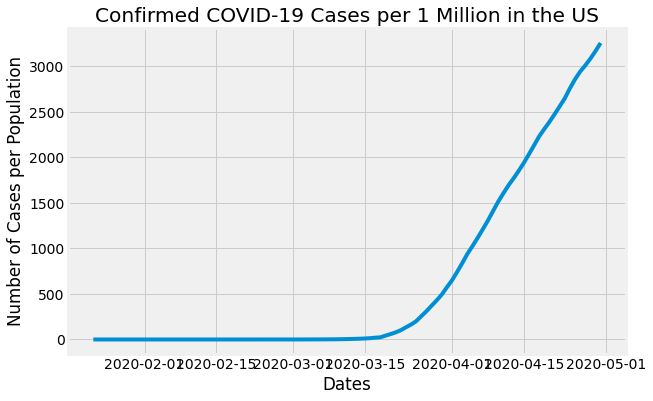

In [ ]:
# Plot the US data for confirmed cases by population
plt.figure(figsize = (10,6))
plt.style.use('fivethirtyeight')
plt.ylabel("Number of Cases per Population")
plt.xlabel("Dates")
plt.plot(subset_t['US Cases/Pop'])
plt.title("Confirmed COVID-19 Cases per 1 Million in the US")
plt.show()

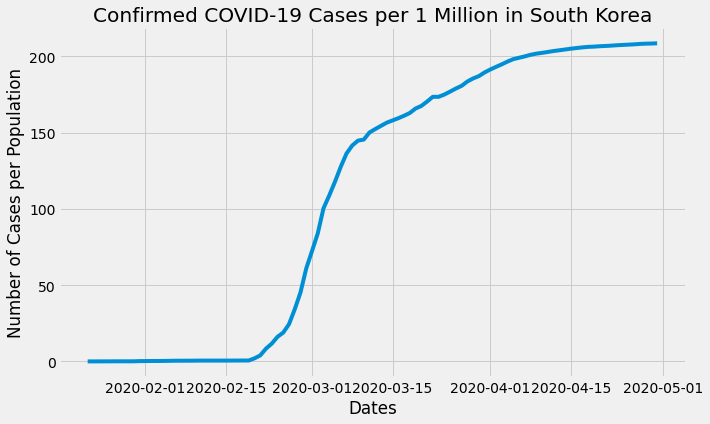

In [ ]:
# Plot the South Korea data for confirmed cases by population
plt.figure(figsize = (10,6))
plt.style.use('fivethirtyeight')
plt.ylabel("Number of Cases per Population")
plt.xlabel("Dates")
plt.plot(subset_t['South Korea Cases/Pop'])
plt.title("Confirmed COVID-19 Cases per 1 Million in South Korea")
plt.show()

In [ ]:
# split our univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

In [ ]:
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
  df = pd.DataFrame(data)
  cols = list()
	# input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
	# put it all together
  agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
  agg.dropna(inplace=True)
  return agg.values

In [ ]:
# fit the model: take the training dataset and the model configuration and 
# return the fit model ready for making predictions.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop

def model_fit(train, config):
	#return None
	# unpack config
	n_input, n_nodes, n_epochs, n_batch, n_diff
	# prepare data
	if n_diff > 0:
		train = difference(train, n_diff)
	# transform series into supervised format
	data = series_to_supervised(train, n_in=n_input)
	# separate inputs and outputs
	train_x, train_y = data[:, :-1], data[:, -1]
	# define model
	model = Sequential()
	model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit model
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

Using TensorFlow backend.


In [ ]:
# forecast with a pre-fit model: take the fit model, the history, and the model 
# configuration and make a single one-step prediction.
def model_predict(model, history, config):
  #return 0.0
  #history[-config]
	# unpack config
	n_input, _, _, _, n_diff
	# prepare data
	correction = 0.0
	if n_diff > 0:
		correction = history[-n_diff]
		history = difference(history, n_diff)
	# shape input for model
	x_input = np.array(history[-n_input:]).reshape((1, n_input))
	# make forecast
	yhat = model.predict(x_input, verbose=0)
	# correct forecast if it was differenced
	return correction + yhat[0]

In [ ]:
# root mean squared error (RMSE)
# calculate the RMSE between the predictions and the true values
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
	return math.sqrt(mean_squared_error(actual, predicted))

In [ ]:
# difference dataset
def difference(data, order):
	return [data[i] - data[i - order] for i in range(order, len(data))]

In [ ]:
# Walk-forward validation for univariate data: take the dataset, the number of 
# observations to use as the test set, and the configuration for the model, and 
# returns the RMSE for the model performance on the test set.
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# fit model
	model = model_fit(train, cfg)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	print(' > %.3f' % error)
	return error

In [ ]:
# score a model, return None on failure: evaluate the model configuration 
# multiple times (using walk forward validation), and report the error as the 
# average error across each evaluation
import statistics

def repeat_evaluate(data, config, n_test, n_repeats=10):
	# convert config to a key
	key = str(config)
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	# summarize score
	result = statistics.mean(scores)
	print('> Model[%s] %.3f' % (key, result))
	return (key, result)

In [ ]:
# grid search configs: take the dataset, a list of configurations to search,  
# the number of observations to use as the test set, and perform the search.
# Once mean scores are calculated for each config, the list of configurations is 
# sorted in ascending order so that the best scores are listed first.
def grid_search(data, cfg_list, n_test):
	# evaluate configs
	scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

In [ ]:
# create a list of configs to try
def model_configs():
	# define scope of configs
	n_input = [1, 12]
	n_nodes = [50, 100]
	n_epochs = [1, 100]
	n_batch = [1, 100]
	n_diff = [0, 12]
	# create configs
	configs = list()
	for i in n_input:
		for j in n_nodes:
			for k in n_epochs:
				for l in n_batch:
					for m in n_diff:
						cfg = [i, j, k, l, m]
						configs.append(cfg)
	print('Total configs: %d' % len(configs))
	return configs

In [ ]:
# Set some values for parameters 
# (adjusted these according to what seemed to work for the model)
n_nodes = 100
n_dense = 1
n_input = 1
n_batch = 100
num_classes = 10
n_epochs = 20
n_diff = 7

In [ ]:
# train on the first 70 days, use the last 30 days for a test set
n_test = 30
# define config: a list of index offsets in the prior observations relative to 
# the time to be forecasted that will be used as the prediction.
# In this case, 7 is the observation 7 days ago
cfg_list = [1, 7, 14, 21, 28]

# grid search - MLP model for univariate time series forecasting
scores = grid_search(subset_t['South Korea Cases/Pop'], cfg_list, n_test)

print('done')
# list top 10 config:
for cfg, error in scores[:10]:
  print(cfg, error)

 > 4.753
 > 3.896
 > 5.284
 > 5.851
 > 4.010
 > 4.029
 > 5.429
 > 4.321
 > 7.870
 > 6.309
> Model[1] 5.175
 > 4.638
 > 6.142
 > 7.234
 > 6.742
 > 4.712
 > 5.027
 > 5.272
 > 4.549
 > 4.399
 > 5.368
> Model[7] 5.408
 > 6.458
 > 4.638
 > 7.244
 > 6.244
 > 6.487
 > 6.055
 > 2.943
 > 5.428
 > 5.175
 > 7.030
> Model[14] 5.770
 > 4.363
 > 5.479
 > 7.447
 > 4.476
 > 8.327
 > 5.529
 > 6.269
 > 7.449
 > 4.474
 > 6.761
> Model[21] 6.057
 > 6.685
 > 2.342
 > 6.269
 > 4.990
 > 4.579
 > 5.270
 > 4.720
 > 5.862
 > 3.625
 > 5.100
> Model[28] 4.944
done
28 4.944190518123652
1 5.175297859058838
7 5.408196091649833
14 5.770425885620103
21 6.057456815535802


In [ ]:
# Create a new dataset with Consumer Discretionary Sector stock prices
df_copy['XLY'] = df_copy['XLY'].astype(float)
new_set = df_copy['XLY']
new_set.head()

Date
2020-01-02    126.91
2020-01-03    125.83
2020-01-06    126.18
2020-01-07    125.98
2020-01-08    126.36
Name: XLY, dtype: float64

In [ ]:
# Set the index to match the data we have for Confirmed COVID-19 cases
idx = pd.date_range('2020-01-22', '2020-04-30')

# Since the market is not open every day, I want to fill in the days where there
# were no changes with the closing price from the previous day of trading
new_set.index = pd.DatetimeIndex(new_set.index)
# Start by adding the missing dates (with values of 0)
new_set = new_set.reindex(idx, fill_value=0)
print(new_set)

2020-01-22    127.54
2020-01-23    127.73
2020-01-24    125.95
2020-01-25      0.00
2020-01-26      0.00
               ...  
2020-04-26      0.00
2020-04-27    114.35
2020-04-28    114.80
2020-04-29    117.33
2020-04-30    116.60
Freq: D, Name: XLY, Length: 100, dtype: float64


In [ ]:
# Create a separate array with the closing values, filling in the 0 values with 
# the value from the previous day of trading
prev = new_set.iloc[0]

num_close = []
for row in new_set:
  if row == 0:
    num_close.append(prev)
  else:
    num_close.append(row)
    prev = row

print(num_close)

[127.54, 127.73, 125.95, 125.95, 125.95, 124.07, 125.28, 125.21, 125.0, 125.32, 125.32, 125.32, 126.21, 128.51, 129.16, 128.87, 128.31, 128.31, 128.31, 129.76, 130.78, 132.12, 131.89, 131.69, 131.69, 131.69, 131.69, 131.68, 132.27, 132.32, 130.3, 130.3, 130.3, 125.82, 122.46, 121.49, 116.58, 115.83, 115.83, 115.83, 119.81, 116.91, 120.95, 116.44, 114.65, 114.65, 114.65, 107.43, 113.37, 107.17, 96.34, 102.3, 102.3, 102.3, 89.34, 92.78, 87.45, 90.5, 87.81, 87.81, 87.81, 87.53, 95.74, 97.42, 101.45, 98.05, 98.05, 98.05, 100.1, 98.08, 93.7, 94.05, 92.41, 92.41, 92.41, 100.1, 101.59, 104.79, 106.68, 106.68, 106.68, 106.68, 106.65, 110.82, 108.39, 109.69, 112.93, 112.93, 112.93, 110.96, 108.08, 110.41, 110.38, 112.25, 112.25, 112.25, 114.35, 114.8, 117.33, 116.6]


In [ ]:
# Put this filled-in data into a new dataframe
new_df = pd.DataFrame(num_close, columns=['XLY close'])
new_df.shape

(100, 1)

In [ ]:
# Review the data we have for Confirmed Cases
# Note that 6 columns at the end include Cases per population (numbers per 1 million)
subset_t.head(5)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,US Cases/Pop,Italy Cases/Pop,Spain Cases/Pop,South Korea Cases/Pop,Iran Cases/Pop,China Cases/Pop
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003047,0.0,0.0,0.019365,0.0,0.393396
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0.003047,0.0,0.0,0.019365,0.0,0.461594
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0.006094,0.0,0.0,0.038730,0.0,0.660445
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0.006094,0.0,0.0,0.038730,0.0,1.009332
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0.015235,0.0,0.0,0.058095,0.0,1.489591


In [ ]:
# Create a dataframe with just the US Cases/Pop
us_cases = pd.DataFrame(subset_t, columns=['US Cases/Pop'])
us_cases.shape

(100, 1)

In [ ]:
# Create a dataframe with just the South Korea Cases/Pop
korea_cases = pd.DataFrame(subset_t, columns=['South Korea Cases/Pop'])
korea_cases.shape

(100, 1)

In [ ]:
# Determine the Change in Number of Cases for South Korea (new # of cases each day)
# The change is the difference between the current day and the last day
cases_change = [0]
i = 0
for current, last in zip(korea_cases['South Korea Cases/Pop'][1:], korea_cases['South Korea Cases/Pop']):
  diff = current - last
  cases_change.append(diff)
# You can see that some days, there was no change
print(cases_change)

[0, 0.0, 0.019364833462432222, 0.0, 0.019364833462432222, 0.019364833462432222, 0.0, 0.0, 0.0, 0.13555383423702555, 0.01936483346243223, 0.05809450038729666, 0.0, 0.01936483346243223, 0.05809450038729669, 0.07745933384972886, 0.01936483346243223, 0.0, 0.019364833462432285, 0.03872966692486435, 0.01936483346243223, 0.0, 0.0, 0.0, 0.0, 0.01936483346243223, 0.01936483346243223, 0.01936483346243223, 0.0, 1.4136328427575524, 1.936483346243222, 4.434546862896979, 3.2726568551510464, 4.473276529821842, 2.788536018590243, 5.499612703330751, 9.779240898528275, 11.057319907048793, 15.743609604957406, 11.347792408985285, 11.599535243996883, 16.47947327652983, 8.42370255615802, 9.043377226955855, 9.779240898528258, 8.67544539116966, 5.286599535243994, 3.1758326878388914, 0.6777691711851048, 4.686289697908592, 2.2075910147172806, 2.1301316808675494, 2.072037180480237, 1.4717273431448632, 1.4329976762199976, 1.626646010844297, 1.8009295120062063, 2.943454686289698, 1.6847405112315812, 2.846630518977

In [ ]:
# Determine the Change in Number of Cases for the US (new # of cases each day)
# The change is the difference between the current day and the last day
cases_change_us = [0]
i = 0
for current, last in zip(us_cases['US Cases/Pop'][1:], us_cases['US Cases/Pop']):
  diff = current - last
  cases_change_us.append(diff)
# While the changes start small, the numbers keep increasing for the US
print(cases_change_us)

[0, 0.0, 0.0030469226081657527, 0.0, 0.00914076782449726, 0.0, 0.0, 0.0, 0.0, 0.006093845216331505, 0.003046922608165751, 0.0, 0.009140767824497256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030469226081657544, 0.0, 0.0030469226081657544, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006093845216331502, 0.0, 0.0, 0.10968921389396707, 0.0, 0.018281535648994512, 0.003046922608165775, 0.006093845216331495, 0.024375380865326035, 0.018281535648994512, 0.07312614259597805, 0.06093845216331506, 0.09445460085313834, 0.20719073735527116, 0.13711151736745886, 0.4265691651432053, 0.35344302254722737, 0.19804996953077403, 1.1456429006703233, 0.9811090798293725, 1.1639244363193169, 1.5722120658135283, 1.6697135892748332, 2.3522242535039606, 3.4521633150517985, 5.450944546008532, 4.149908592321754, 18.171846435100548, 16.83729433272395, 19.27787934186471, 23.388177940280315, 32.196831200487495, 30.143205362583814, 36.691042047531994, 55.02132845825713, 54.299207800121906, 60.3534430225472, 59.244363193174934, 63

In [ ]:
# Add a column to the dataframe that holds South Korea Cases/Pop to show daily changes
korea_cases['daily change'] = cases_change
korea_cases.shape

(100, 2)

In [ ]:
# Add a column to the dataframe that holds US Cases/Pop to show daily changes
us_cases['daily change'] = cases_change_us
us_cases.shape

(100, 2)

In [ ]:
# Check the data to confirm it looks correct
korea_cases.tail()

,South Korea Cases/Pop,daily change
2020-04-26,207.939582,0.193648
2020-04-27,208.210689,0.271108
2020-04-28,208.384973,0.174284
2020-04-29,208.462432,0.077459
2020-04-30,208.636716,0.174284


In [ ]:
# Check the data to confirm it looks correct
us_cases.tail()

,US Cases/Pop,daily change
2020-04-26,2942.672151,84.189519
2020-04-27,3010.959781,68.287629
2020-04-28,3085.258988,74.299208
2020-04-29,3168.522243,83.263254
2020-04-30,3258.452163,89.929921


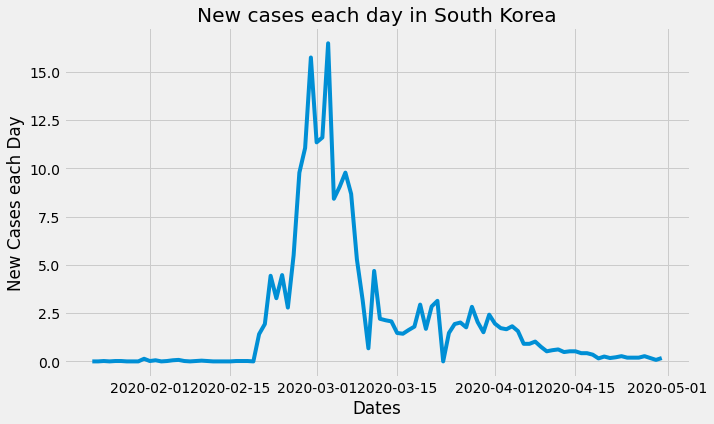

In [ ]:
# Plot the Korea data for new daily confirmed cases
plt.figure(figsize = (10,6))
plt.style.use('fivethirtyeight')
plt.ylabel("New Cases each Day")
plt.xlabel("Dates")
plt.plot(korea_cases['daily change'])
plt.title("New cases each day in South Korea")
plt.show()

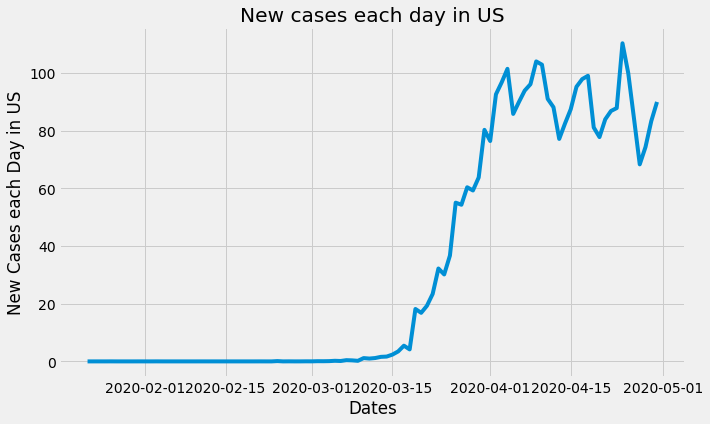

In [ ]:
# Plot the US data for confirmed cases
plt.figure(figsize = (10,6))
plt.style.use('fivethirtyeight')
plt.ylabel("New Cases each Day in US")
plt.xlabel("Dates")
plt.plot(us_cases['daily change'])
plt.title("New cases each day in US")
plt.show()

In [ ]:
# Add a column to our US data to hold an index (row numbers)
us_cases['idx'] = np.arange(len(us_cases))
us_cases.shape

(100, 3)

In [ ]:
# Add a column to our South Korea data to hold an index (row numbers)
korea_cases['idx'] = np.arange(len(korea_cases))
korea_cases.shape

(100, 3)

In [ ]:
# Add an index to our closing stock price data for Consumer Discretionary 
# We can merge our data on this index
new_df['idx'] = np.arange(len(new_df))
new_df.shape

(100, 2)

In [ ]:
# create a new merged dataframe with us_cases and XLY close prices
us_df = new_df.merge(us_cases, left_on='idx', right_on='idx', how='outer')

In [ ]:
# create a new merged dataframe with korea_cases and XLY close prices
korea_df = new_df.merge(korea_cases, left_on='idx', right_on='idx', how='outer')

In [ ]:
# Check that our dataframe holds the data we expect
korea_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   XLY close              100 non-null    float64
 1   idx                    100 non-null    int64  
 2   South Korea Cases/Pop  100 non-null    float64
 3   daily change           100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.9 KB


In [ ]:
# Tested if training on XLY close prices could predict US daily change, 
# but the results were poor
n_test = 30
X_train_us, X_test_us = train_test_split(us_df['XLY close'], n_test)
y_train_us, y_test_us = train_test_split(us_df['daily change'], n_test)

In [ ]:
# predictions on South Korea daily change were more promising
# Set n_test to 30 days (1 month)
n_test = 30
X_train, X_test = train_test_split(korea_df['XLY close'], n_test)
y_train, y_test = train_test_split(korea_df['daily change'], n_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
# Testing Grid Search
scores = ['precision','recall']
model_gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.1, 0.3, 0.5, 0.7],
              'subsample'    : [0.3, 0.1, 0.01, 0.05],
              'n_estimators' : [20, 50, 100, 200],
              'max_depth'    : [5, 7, 9, 11]}

In [ ]:
# check available parameters that can be tested
model_gbr.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
# Tested using GradientBoostingRegressor, a set of parameters, cross-validation 
# (cv = 3 seemed to work best), and using all processors (n_jobs = -1)
grid = GridSearchCV(estimator = model_gbr, param_grid = parameters, cv = 3, n_jobs = -1)
train_grid = X_train.values.reshape(-1,1)
grid.fit(train_grid, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [ ]:
# Results from GridSearchCV
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    

print("\n The best estimator across ALL searched params:\n",
      grid.best_estimator_)

print("\n The best score across ALL searched params:\n",
      grid.best_score_)

print("\n The best parameters across ALL searched params:\n",
      grid.best_params_)

print("Train R-squared Score: %.2f" % grid.score(train_grid, y_train))

print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=11,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.05, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 -42.55261982774778

 The best parameters across ALL searched params:
 {'learning_rate': 0.3, 'max_depth': 11, 'n_estimators': 20, 'subsample': 0.05}
Train R-squared Score: 0.66



In [ ]:
# Run the Mulilayer Perceptron Regressor
# Results from GridSearchCV and MLPRegressor were not very consistent, and 
# often provided poor results, so decided to use the Keras Sequential model
mlp = MLPRegressor(activation="relu", solver="adam", alpha = 0.1, warm_start=True,
                   learning_rate="invscaling").fit(train_grid, y_train)
print(mlp.score(train_grid,y_train))

-1.068477849816679


In [ ]:
# define the model 
# Since our data is continuous, using Regression (finding a model or function 
# for distinguishing the data into continuous real values instead of using 
# classes or discrete values, as would be used for classification).
# Seemed to perform better with additional Dense layers
# For Regression score, look at 'mean squared error' 
# (for Classification, look at 'accuracy' -- using this for regression problem
# results in accuracy score of 0)
model = Sequential()
model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
model.add(Dense(n_dense, activation = None))
model.add(Dense(n_dense, activation='sigmoid'))
model.add(Dense(n_dense, activation='tanh'))

# after testing, sgd and adam seem to perform the best
# Using mean squared logarithmic error - show the MSLE between y_true & y_pred
# Show mean squared error in metrics for comparison
model.compile(optimizer = 'adam',
              loss = 'mean_squared_logarithmic_error', 
              metrics = ['mean_squared_error'])

# values as previously defined, including validation split of 0.30
history = model.fit(X_train, y_train,
                    batch_size = n_batch,
                    epochs = n_epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))
# Score == Mean Squared Logarithmic Error, show Mean Squared Error for comparison
score, mse = model.evaluate(X_test, y_test, verbose = 1, batch_size = n_batch)
print('Test loss:', score)
print('Test MSE: ', mse)

Train on 70 samples, validate on 30 samples
Epoch 1/20
70/70 [==============================] - 0s 2ms/step - loss: 1.5647 - mean_squared_error: 23.9839 - val_loss: 0.2876 - val_mean_squared_error: 1.1513
Epoch 2/20
70/70 [==============================] - 0s 59us/step - loss: 1.5647 - mean_squared_error: 23.9839 - val_loss: 0.2876 - val_mean_squared_error: 1.1513
Epoch 3/20
70/70 [==============================] - 0s 60us/step - loss: 1.5647 - mean_squared_error: 23.9839 - val_loss: 0.2876 - val_mean_squared_error: 1.1513
Epoch 4/20
70/70 [==============================] - 0s 52us/step - loss: 1.5647 - mean_squared_error: 23.9839 - val_loss: 0.2876 - val_mean_squared_error: 1.1513
Epoch 5/20
70/70 [==============================] - 0s 55us/step - loss: 1.5647 - mean_squared_error: 23.9839 - val_loss: 0.2876 - val_mean_squared_error: 1.1513
Epoch 6/20
70/70 [==============================] - 0s 47us/step - loss: 1.5647 - mean_squared_error: 23.9839 - val_loss: 0.2876 - val_mean_squared

In [ ]:
# values as previously defined, including validation split of 0.30
history_us = model.fit(X_train_us, y_train_us,
                    batch_size = n_batch,
                    epochs = n_epochs,
                    verbose = 1,
                    validation_data = (X_test_us, y_test_us))
# Score == Mean Squared Error
score_us, mse_us = model.evaluate(X_test_us, y_test_us, verbose = 1, batch_size = n_batch)
print('Test loss (US):', score_us)
print('Test MSE (US): ', mse_us)

Train on 70 samples, validate on 30 samples
Epoch 1/20
70/70 [==============================] - 0s 107us/step - loss: 2.7146 - mean_squared_error: 412.2542 - val_loss: 20.2583 - val_mean_squared_error: 8154.3691
Epoch 2/20
70/70 [==============================] - 0s 86us/step - loss: 2.7146 - mean_squared_error: 412.2543 - val_loss: 20.2583 - val_mean_squared_error: 8154.3691
Epoch 3/20
70/70 [==============================] - 0s 41us/step - loss: 2.7146 - mean_squared_error: 412.2542 - val_loss: 20.2583 - val_mean_squared_error: 8154.3691
Epoch 4/20
70/70 [==============================] - 0s 74us/step - loss: 2.7146 - mean_squared_error: 412.2542 - val_loss: 20.2583 - val_mean_squared_error: 8154.3691
Epoch 5/20
70/70 [==============================] - 0s 64us/step - loss: 2.7146 - mean_squared_error: 412.2542 - val_loss: 20.2583 - val_mean_squared_error: 8154.3691
Epoch 6/20
70/70 [==============================] - 0s 68us/step - loss: 2.7146 - mean_squared_error: 412.2543 - val_los

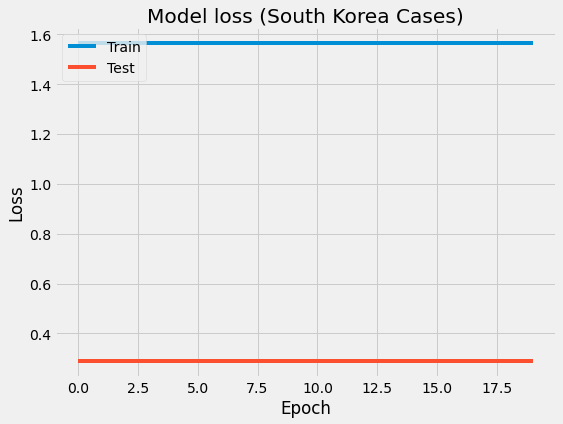

In [ ]:
# Plot training & validation loss values, using the code from the keras api to 
# plot the model loss. As we get to the 20th epoch the test loss and train loss 
# are very close and they are minimized.
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss (South Korea Cases)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test', 'Log Test'], loc='upper left')
plt.show()

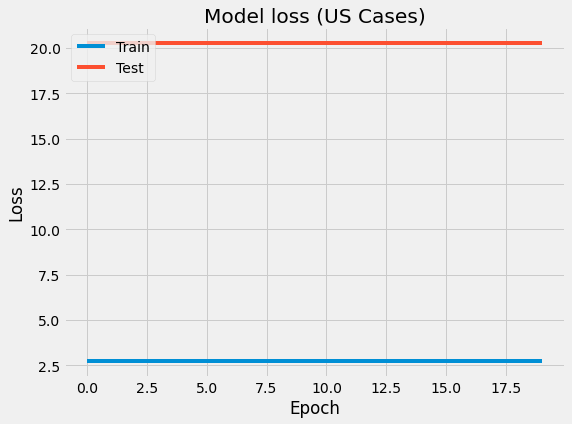

In [ ]:
# Plot training & validation loss values, using the code from the keras api to 
# plot the model loss. As we get to the 20th epoch the test loss and train loss 
# are very close and they are minimized.
plt.figure(figsize=(8, 6))
plt.plot(history_us.history['loss'])
plt.plot(history_us.history['val_loss'])
plt.title('Model loss (US Cases)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Use go.Figure() to make a line graph comparing model loss
labels = ["Train (South Korea)", "Test (South Korea)", "Train (US)", "Test (US)"]
colors = ['red', 'green', 'blue', 'orange']
mode_size = [10, 10, 10, 10]
line_size = [2, 2, 2, 2]

fig = go.Figure()

fig.add_trace(go.Scatter(y=history.history['loss'], 
                         name=labels[0], mode="lines", connectgaps=True,
                         line= dict(color = colors[0], width=line_size[0])))

fig.add_trace(go.Scatter(y=history.history['val_loss'], 
                         name=labels[1], mode="lines", connectgaps=True,
                         line= dict(color = colors[1], width=line_size[1])))

fig.add_trace(go.Scatter(y=history_us.history['loss'], 
                         name=labels[2], mode="lines", connectgaps=True,
                         line= dict(color = colors[2], width=line_size[2])))

fig.add_trace(go.Scatter(y=history_us.history['val_loss'], 
                         name=labels[3], mode="lines", connectgaps=True,
                         line= dict(color = colors[3], width=line_size[3])))

fig.update_layout(
    xaxis = dict(tickmode = 'array', title_text="Epoch"),
    yaxis=dict(title_text="Loss"),
    title_text="Model Loss",
    paper_bgcolor="LightSteelBlue")
# Interactive graph - click on individual graphs to highlight
# note that although they look straight in the larger image, if focusing on a 
# single graph, the adjustments for each epoch are there 
fig.show()

In [ ]:
# Apply normalization before feeding to LSTM using sklearn:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler shrinks the range of our values into 0 or 1
scaler = MinMaxScaler()
train_data = X_train.values.reshape(-1,1)
test_data = X_test.values.reshape(-1,1)
# fit and transform the training data
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

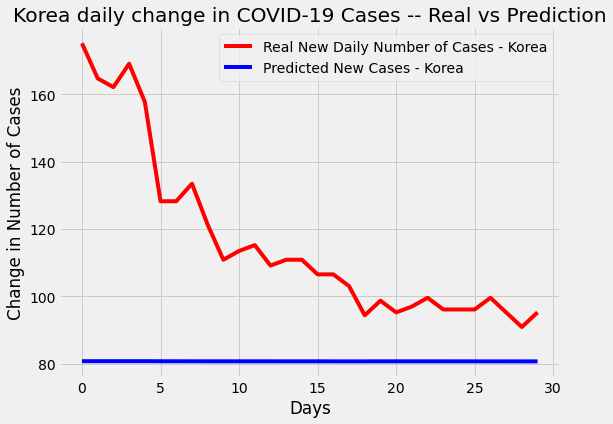

In [ ]:
# Store the original values for plotting against the predictions 
y_test_values = y_test.values.reshape(-1,1)
org_y = scaler.inverse_transform(y_test_values)

# Predict the change in number of cases with the model
predicted_y = model.predict(test_data)
predicted_y = scaler.inverse_transform(predicted_y)

# plot the results 
plt.figure(figsize=(8, 6))
plt.plot(org_y, color = 'red', label = 'Real New Daily Number of Cases - Korea')
plt.plot(predicted_y, color = 'blue', label = 'Predicted New Cases - Korea')
plt.title('Korea daily change in COVID-19 Cases -- Real vs Prediction')
plt.xlabel('Days')
plt.ylabel('Change in Number of Cases')
plt.legend()
plt.show()

In [ ]:
# MinMaxScaler shrinks the range of our values into 0 or 1
scaler2 = MinMaxScaler()
train_data_us = X_train_us.values.reshape(-1,1)
test_data_us = X_test_us.values.reshape(-1,1)
# fit and transform the training data
scaler.fit(train_data_us)
train_data_us = scaler.transform(train_data_us)
test_data_us = scaler.transform(test_data_us)

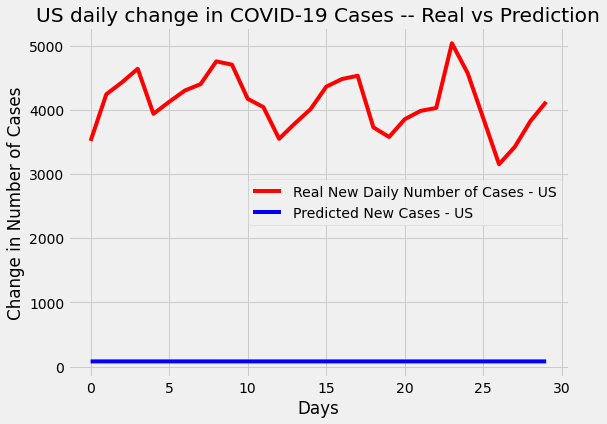

In [ ]:
# Store the original values for plotting against the predictions 
y_test_values_us = y_test_us.values.reshape(-1,1)
org_y_us = scaler.inverse_transform(y_test_values_us)

# Predict the change in number of cases with the model
predicted_y_us = model.predict(test_data_us)
predicted_y_us = scaler.inverse_transform(predicted_y_us)

# plot the results 
plt.figure(figsize=(8, 6))
plt.plot(org_y_us, color = 'red', label = 'Real New Daily Number of Cases - US')
plt.plot(predicted_y_us, color = 'blue', label = 'Predicted New Cases - US')
plt.title('US daily change in COVID-19 Cases -- Real vs Prediction')
plt.xlabel('Days')
plt.ylabel('Change in Number of Cases')
plt.legend()
plt.show()

In [ ]:
# Try comparing total commodities by state with the Confirmed Cases by state
commodities = pd.read_csv(
  '/content/drive/My Drive/CSCI611-Covid19-Project/state_commodities.csv'
)

commodities.head()
#/content/drive/My Drive/CSCI611-Covid19-Project/

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,576.2,674.7,532.3,721.4,726.5,774.5,698.6,842.3,"1,052.4","1,043.1","1,134.8","1,408.1","1,472.4","1,590.6","1,513.1","1,216.8","1,234.4","1,310.2","1,348.8"
1,Alaska,6.3,6.9,6.5,8.3,8.4,9.8,9.5,10.2,10.6,10.3,11.5,12.8,13.3,14.5,16.9,14.5,14.9,16.7,16.6
2,Arizona,486.0,467.2,511.9,552.8,632.3,663.7,706.2,843.9,"1,014.2",850.7,"1,070.1","1,514.8","1,335.4","1,435.6","1,334.5","1,283.3","1,312.3","1,513.2","1,466.7"
3,Arkansas,"1,308.0","1,348.1","1,328.9","1,802.0","1,915.0","1,939.9","2,051.7","2,606.0","3,510.5","2,861.8","3,190.1","3,507.8","4,010.0","4,022.5","3,624.8","3,135.4","3,002.6","3,182.4","3,013.5"
4,California,"6,854.8","7,090.5","7,212.3","7,850.8","8,705.8","9,683.1","10,354.4","11,564.5","14,015.1","13,460.3","15,355.4","18,198.0","20,184.3","22,782.2","23,931.0","22,843.9","21,799.5","22,656.8","23,304.9"


In [ ]:
# Get data for confirmed cases by state
states = pd.read_csv(
  '/content/drive/My Drive/CSCI611-Covid19-Project/04-30-2020-US.csv'
)

states.head()
#/content/drive/My Drive/CSCI611-Covid19-Project/

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-01 02:32:32,32.3182,-86.9023,7088,272,0,6816.0,1,151.165615,87196.0,978.0,3.837472,84000001,USA,1859.627115,13.797968
1,Alaska,US,2020-05-01 02:32:32,61.3707,-152.4044,355,9,252,94.0,2,59.389476,19119.0,NaN,2.535211,84000002,USA,3198.499705,NaN
2,American Samoa,US,2020-05-01 02:32:32,-14.2710,-170.1320,0,0,0,0.0,60,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-05-01 02:32:32,33.7298,-111.4312,7655,320,1499,5836.0,4,105.169634,71786.0,1169.0,4.180274,84000004,USA,986.245241,15.271065
4,Arkansas,US,2020-05-01 02:32:32,34.9697,-92.3731,3281,61,1305,1915.0,5,126.727145,48379.0,402.0,1.859189,84000005,USA,1868.617052,12.252362


In [ ]:
# check shape of each dataframe so we know how to prepare the data
print("Commodities shape: ", commodities.shape)
print("States shape: ", states.shape)

Commodities shape:  (50, 20)
States shape:  (58, 18)


In [ ]:
# Transpose (so we'll be able to drop the extra territories, since commodities
# don't include data for these areas)
states_t = states.transpose()
states_t.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Country_Region,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US
Last_Update,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32


In [ ]:
# Only have commodity data for 50 states, so drop other Provinces
states_t.drop([2, 9, 10, 13, 14, 39, 44, 52], axis = 1, inplace = True)
states_t.head(3)

,0,1,3,4,5,6,7,8,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,45,46,47,48,49,50,51,53,54,55,56,57
Province_State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Country_Region,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US,US
Last_Update,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32,2020-05-01 02:32:32


In [ ]:
# flip dataframe back to how we had it originally
states = states_t.transpose()
states.head(3)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-01 02:32:32,32.3182,-86.9023,7088,272,0,6816,1,151.166,87196,978,3.83747,84000001,USA,1859.63,13.798
1,Alaska,US,2020-05-01 02:32:32,61.3707,-152.404,355,9,252,94,2,59.3895,19119,NaN,2.53521,84000002,USA,3198.5,NaN
3,Arizona,US,2020-05-01 02:32:32,33.7298,-111.431,7655,320,1499,5836,4,105.17,71786,1169,4.18027,84000004,USA,986.245,15.2711


In [ ]:
# Change date column name to 'Date'
commodities.rename(columns = {'Unnamed: 0':'State'}, inplace = True) 
commodities.head(3)

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,576.2,674.7,532.3,721.4,726.5,774.5,698.6,842.3,"1,052.4","1,043.1","1,134.8","1,408.1","1,472.4","1,590.6","1,513.1","1,216.8","1,234.4","1,310.2","1,348.8"
1,Alaska,6.3,6.9,6.5,8.3,8.4,9.8,9.5,10.2,10.6,10.3,11.5,12.8,13.3,14.5,16.9,14.5,14.9,16.7,16.6
2,Arizona,486.0,467.2,511.9,552.8,632.3,663.7,706.2,843.9,"1,014.2",850.7,"1,070.1","1,514.8","1,335.4","1,435.6","1,334.5","1,283.3","1,312.3","1,513.2","1,466.7"


In [ ]:
# Rename Province_State to State (to match commodities data)
states.rename(columns = {'Province_State':'State'}, inplace = True) 
states.head()

,State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-01 02:32:32,32.3182,-86.9023,7088,272,0,6816,1,151.166,87196,978,3.83747,84000001,USA,1859.63,13.798
1,Alaska,US,2020-05-01 02:32:32,61.3707,-152.404,355,9,252,94,2,59.3895,19119,NaN,2.53521,84000002,USA,3198.5,NaN
3,Arizona,US,2020-05-01 02:32:32,33.7298,-111.431,7655,320,1499,5836,4,105.17,71786,1169,4.18027,84000004,USA,986.245,15.2711
4,Arkansas,US,2020-05-01 02:32:32,34.9697,-92.3731,3281,61,1305,1915,5,126.727,48379,402,1.85919,84000005,USA,1868.62,12.2524
5,California,US,2020-05-01 02:32:32,36.1162,-119.682,50130,2031,0,48099,6,127.855,625337,NaN,4.05147,84000006,USA,1594.9,NaN


In [ ]:
# Create a dataframe with just the South Korea Cases/Pop
state_cases = pd.DataFrame(states, columns=['State', 'Incident_Rate'])
state_cases.shape

(50, 2)

In [ ]:
# Merge the state confirmed cases and commodities dataframes
state_com = commodities.merge(state_cases, left_on="State", right_on="State", how='outer')
state_com.shape

(51, 21)

In [ ]:
# View the data. Note that the USDA misspelled Massachusetts 
# (added an extra 's'), so the states didn't merge perfectly
state_com

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Incident_Rate
0,Alabama,576.2,674.7,532.3,721.4,726.5,774.5,698.6,842.3,"1,052.4","1,043.1","1,134.8","1,408.1","1,472.4","1,590.6","1,513.1","1,216.8","1,234.4","1,310.2","1,348.8",151.166
1,Alaska,6.3,6.9,6.5,8.3,8.4,9.8,9.5,10.2,10.6,10.3,11.5,12.8,13.3,14.5,16.9,14.5,14.9,16.7,16.6,59.3895
2,Arizona,486.0,467.2,511.9,552.8,632.3,663.7,706.2,843.9,"1,014.2",850.7,"1,070.1","1,514.8","1,335.4","1,435.6","1,334.5","1,283.3","1,312.3","1,513.2","1,466.7",105.17
3,Arkansas,"1,308.0","1,348.1","1,328.9","1,802.0","1,915.0","1,939.9","2,051.7","2,606.0","3,510.5","2,861.8","3,190.1","3,507.8","4,010.0","4,022.5","3,624.8","3,135.4","3,002.6","3,182.4","3,013.5",126.727
4,California,"6,854.8","7,090.5","7,212.3","7,850.8","8,705.8","9,683.1","10,354.4","11,564.5","14,015.1","13,460.3","15,355.4","18,198.0","20,184.3","22,782.2","23,931.0","22,843.9","21,799.5","22,656.8","23,304.9",127.855
5,Colorado,893.3,918.7,919.3,873.1,741.2,831.5,967.9,"1,286.9","1,474.7","1,232.2","1,510.5","1,860.7","1,722.8","1,641.8","1,796.8","1,650.4","1,597.2","1,763.2","1,866.3",269.711
6,Connecticut,132.5,129.1,131.4,130.7,135.3,153.2,160.7,193.8,194.0,187.9,213.9,238.8,249.6,253.2,259.8,297.3,284.0,292.2,276.3,776.936
7,Delaware,130.7,148.3,122.2,120.8,136.8,141.0,137.8,187.3,239.8,230.9,241.5,269.2,310.9,308.1,322.9,259.5,256.5,264.5,263.5,486.155
8,Florida,"1,882.9","1,857.5","1,797.7","1,882.4","1,877.4","2,095.0","2,276.2","2,608.4","2,804.4","2,565.3","2,963.2","3,334.9","3,645.4","3,659.0","3,648.6","3,493.8","3,377.8","3,448.6","3,146.3",158.671
9,Georgia,"1,302.8","1,322.6","1,101.5","1,332.2","1,475.4","1,480.0","1,514.2","1,910.8","2,287.0","2,105.7","2,587.9","3,218.1","3,250.4","3,602.7","3,000.4","2,846.2","2,924.2","2,852.5","2,865.0",259.029


In [ ]:
# Since the incident rate in Massachusetts was 906.28, we use that for NaN values
state_com = state_com.fillna(906.28)
state_com.tail()

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Incident_Rate
46,Washington,"1,312.9","1,404.7","1,411.3","1,557.4","1,650.5","1,613.7","1,841.2","2,401.4","2,676.6","2,331.6","2,800.6","3,649.5","3,688.7","3,995.3","3,800.2","3,476.9","3,527.7","3,675.9","3,614.5",189.776596
47,West Virginia,59.9,65.8,56.3,61.9,56.3,63.6,67.4,79.3,105.4,104.4,115.2,135.5,158.1,163.1,169.8,143.8,147.8,162.2,160.3,85.034142
48,Wisconsin,921.6,934.1,991.6,"1,089.2","1,128.8","1,171.1","1,515.6","1,818.2","2,346.9","1,802.3","2,411.6","2,928.7","3,167.7","3,108.5","3,094.6","2,868.5","2,878.6","2,955.5","2,979.5",132.455425
49,Wyoming,146.6,159.5,135.9,143.1,106.7,111.4,131.4,151.3,201.7,206.9,235.5,323.8,337.0,348.5,349.4,304.2,294.8,311.0,339.4,112.420561
50,Massachusetts,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.28,906.280104


In [ ]:
# Then drop the extra instance of Massachusetts (last row)
state_com_t = state_com.transpose()
state_com_t = state_com_t.drop(50, axis = 1)
state_com = state_com_t.transpose()

In [ ]:
# Since commodities data included commas, the values are seen as objects
state_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          50 non-null     object
 1   2000           50 non-null     object
 2   2001           50 non-null     object
 3   2002           50 non-null     object
 4   2003           50 non-null     object
 5   2004           50 non-null     object
 6   2005           50 non-null     object
 7   2006           50 non-null     object
 8   2007           50 non-null     object
 9   2008           50 non-null     object
 10  2009           50 non-null     object
 11  2010           50 non-null     object
 12  2011           50 non-null     object
 13  2012           50 non-null     object
 14  2013           50 non-null     object
 15  2014           50 non-null     object
 16  2015           50 non-null     object
 17  2016           50 non-null     object
 18  2017           50 non-null     o

In [ ]:
# Testing on most recent column, remove the commas
# (then we can cast this value to a float)
state_com['2018'] = state_com['2018'].str.replace(',', '')

In [ ]:
# Check that data looks like what we expect
display(state_com['2018'])

0      1348.8
1        16.6
2      1466.7
3      3013.5
4     23304.9
5      1866.3
6       276.3
7       263.5
8      3146.3
9      2865.0
10      307.9
11     2076.1
12     8488.3
13     4649.5
14    10646.9
15     4881.7
16     2221.5
17     1443.2
18      247.2
19      668.8
20      206.1
21     2827.0
22     6942.7
23     1935.6
24     3938.5
25     1196.0
26     6802.3
27      137.1
28       85.0
29      544.3
30      751.5
31     1459.1
32     3470.4
33     4245.9
34     3682.4
35     1810.0
36     2006.9
37     2056.5
38       34.5
39      864.2
40     3560.4
41     1471.6
42     6883.2
43      430.0
44      187.3
45     1094.1
46     3614.5
47      160.3
48     2979.5
49      339.4
Name: 2018, dtype: object

In [ ]:
# set X as the 2018 total commodities for states and y as the Incident rate for states
X = state_com['2018']
y = state_com['Incident_Rate']

In [ ]:
# Make adjustment since we created a custom train_test_split above
from sklearn.model_selection import train_test_split as t_t_s
X_train_state, X_test_state, y_train_state, y_test_state = t_t_s(X,y)

In [ ]:
# Reshape data as needed for preprocessing
X_train_state = np.array(X_train_state).reshape(-1, 1)
X_test_state = np.array(X_test_state).reshape(-1, 1)

In [ ]:
# Use Standard Scalar to fit
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_state.astype(float)) # remember to fit ONLY on training data
X_train_state = scaler.transform(X_train_state)
# now apply the same transformation to the test data
X_test_state = scaler.transform(X_test_state) 

In [ ]:
# values as previously defined, including validation split of 0.30
# However, did not appear to be any correlations between these datasets
# The mean squared logarithmic error is much smaller than mean squared error,
# but still on the high side
history_state = model.fit(X_train_state, y_train_state,
                    batch_size = n_batch,
                    epochs = n_epochs,
                    verbose = 1,
                    validation_data = (X_test_state, y_test_state))
# Score == Mean Squared Error
score_state, mse_state = model.evaluate(X_test_state, y_test_state, verbose = 1, batch_size = n_batch)
print('Test loss (US):', score_state)
print('Test MSE (US): ', mse_state)

Train on 37 samples, validate on 13 samples
Epoch 1/20
37/37 [==============================] - 0s 131us/step - loss: 29.2607 - mean_squared_error: 233640.2656 - val_loss: 27.2765 - val_mean_squared_error: 76626.6484
Epoch 2/20
37/37 [==============================] - 0s 114us/step - loss: 29.2607 - mean_squared_error: 233640.2500 - val_loss: 27.2765 - val_mean_squared_error: 76626.6484
Epoch 3/20
37/37 [==============================] - 0s 139us/step - loss: 29.2607 - mean_squared_error: 233640.2500 - val_loss: 27.2765 - val_mean_squared_error: 76626.6484
Epoch 4/20
37/37 [==============================] - 0s 99us/step - loss: 29.2607 - mean_squared_error: 233640.2500 - val_loss: 27.2765 - val_mean_squared_error: 76626.6484
Epoch 5/20
37/37 [==============================] - 0s 98us/step - loss: 29.2607 - mean_squared_error: 233640.2500 - val_loss: 27.2765 - val_mean_squared_error: 76626.6484
Epoch 6/20
37/37 [==============================] - 0s 92us/step - loss: 29.2607 - mean_squar

,Technology
Date,
2020-04-24,88.63
2020-04-27,89.39
2020-04-28,88.20
2020-04-29,91.82
2020-04-30,91.41


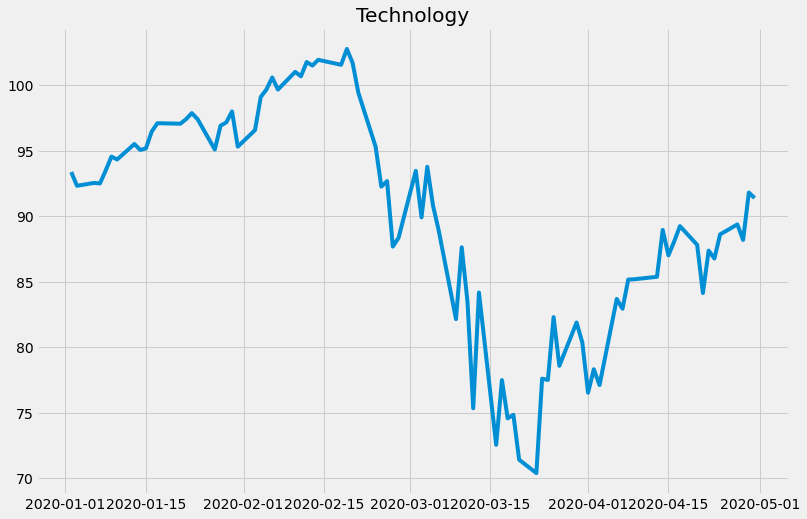

In [ ]:
# Read Market Secret into file2
file2 = pd.read_csv('/content/drive/My Drive/CSCI611-Covid19-Project/MarketSectors-2020-05-01.csv')
#Filter the required sectors into df.market
market = pd.DataFrame()
market['Date'] = file2['Unnamed: 0']
market['ConsumerDiscretionary'] = pd.to_numeric(file2['XLY'], errors='coerce')
market['Energy'] = pd.to_numeric(file2['XLE'], errors='coerce')
market['Industrials'] = pd.to_numeric(file2['XLI'], errors='coerce')
market['Financials'] = pd.to_numeric(file2['XLF'], errors='coerce')
market['HealthCare'] = pd.to_numeric(file2['XLV'], errors='coerce')
market['Technology'] = pd.to_numeric(file2['XLK'], errors='coerce')
market['Utilities'] = pd.to_numeric(file2['XLU'], errors='coerce')
market['ConsumerStaples'] = pd.to_numeric(file2['XLP'], errors='coerce')
market['Materials'] = pd.to_numeric(file2['XLB'], errors='coerce')
market['OilAndGas'] = pd.to_numeric(file2['XOP'], errors='coerce')
market.drop([0,1],inplace=True)
market['Date'] = pd.to_datetime(market['Date']).dt.date
market.reset_index(inplace=True)
market.drop('index',axis=1,inplace=True)

#Select the sector to train and predict
feature = "Technology"
df = pd.DataFrame(market['Date'])
df = df.join(market[feature])
df.set_index('Date',inplace=True)
display(df.tail())
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(feature)
plt.show()

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Scaling the values
df2 = df.values
train_f = df2[:]
scaler_f = MinMaxScaler()
scaler_f.fit(train_f)
train_f = scaler_f.transform(train_f)
#Number of days to predict outcome
n_input_f = 70
n_features_f = 1
model_f = Sequential()

In [ ]:
def train_full(train_f,scaler_f,n_input_f,n_features_f,model_f):
  np.random.seed(7)
  generator_f = TimeseriesGenerator(train_f,train_f,length=n_input_f,batch_size=6)
  model_f.add(LSTM(200,activation='relu',input_shape=(n_input_f,n_features_f)))
  model_f.add(Dropout(0.15))
  model_f.add(Dense(1))
  model_f.compile(optimizer='adam',loss='mse')
  model_f.fit_generator(generator_f,epochs=180,shuffle=False)
train_full(train_f,scaler_f,n_input_f,n_features_f,model_f)

Epoch 1/180
3/3 [==============================] - 1s 197ms/step - loss: 0.3089
Epoch 2/180
3/3 [==============================] - 0s 73ms/step - loss: 0.1948
Epoch 3/180
3/3 [==============================] - 0s 72ms/step - loss: 0.0807
Epoch 4/180
3/3 [==============================] - 0s 77ms/step - loss: 0.0299
Epoch 5/180
3/3 [==============================] - 0s 72ms/step - loss: 0.0120
Epoch 6/180
3/3 [==============================] - 0s 77ms/step - loss: 0.0249
Epoch 7/180
3/3 [==============================] - 0s 72ms/step - loss: 0.0182
Epoch 8/180
3/3 [==============================] - 0s 73ms/step - loss: 0.0150
Epoch 9/180
3/3 [==============================] - 0s 77ms/step - loss: 0.0022
Epoch 10/180
3/3 [==============================] - 0s 72ms/step - loss: 0.0107
Epoch 11/180
3/3 [==============================] - 0s 69ms/step - loss: 0.0041
Epoch 12/180
3/3 [==============================] - 0s 72ms/step - loss: 0.0034
Epoch 13/180
3/3 [==============================

,Predictions
Dates,
2020-04-30,90.657712
2020-05-01,90.964244
2020-05-02,91.263229
2020-05-03,91.556238
2020-05-04,91.843539
...,...
2020-07-04,103.493030
2020-07-05,103.633442
2020-07-06,103.773090


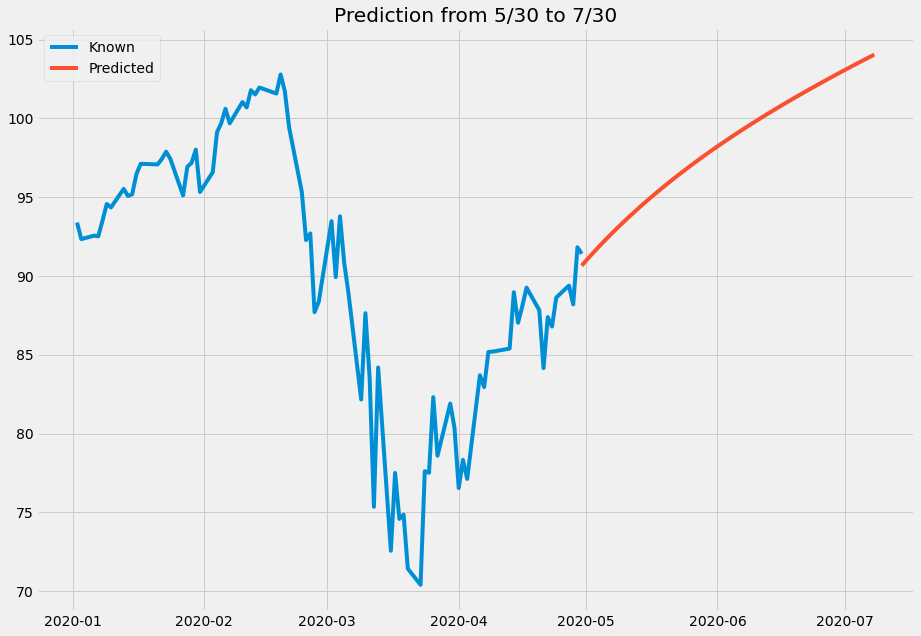

In [ ]:
import datetime
def predict_final(n_input1,n_features1):
  pred_future = []

  batch1 = train_f[-n_input1:].reshape((1,n_input1,n_features1))
  for i in range(n_input1):
    pred_future.append(model_f.predict(batch1)[0])
    #Predict for a day, and add that prediction to predict further for next day
    batch1 = np.append(batch1[:,1:,:],[[pred_future[i]]],axis=1)


  df_predict1 = pd.DataFrame(scaler_f.inverse_transform(pred_future),columns=['Predictions'])
  return df_predict1


out = predict_final(70,1)

fig=plt.figure(figsize=(14,10))
plt.plot(df,label='Known')
out['Dates'] = ""
curr = datetime.datetime(2020, 4, 30)
for i,j in out.iterrows():
  out.loc[i,'Dates'] = curr
  curr = curr + datetime.timedelta(days=1)

out.set_index('Dates',inplace=True)
display(out)


plt.plot(out,label='Predicted')
plt.title("Prediction from 5/30 to 7/30")
plt.legend()

In [ ]:
# 2nd
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = df.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
display(testX.shape)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


(26, 1)

Epoch 1/100
 - 0s - loss: 0.5142
Epoch 2/100
 - 0s - loss: 0.3917
Epoch 3/100
 - 0s - loss: 0.2824
Epoch 4/100
 - 0s - loss: 0.1869
Epoch 5/100
 - 0s - loss: 0.1121
Epoch 6/100
 - 0s - loss: 0.0645
Epoch 7/100
 - 0s - loss: 0.0424
Epoch 8/100
 - 0s - loss: 0.0337
Epoch 9/100
 - 0s - loss: 0.0311
Epoch 10/100
 - 0s - loss: 0.0301
Epoch 11/100
 - 0s - loss: 0.0291
Epoch 12/100
 - 0s - loss: 0.0287
Epoch 13/100
 - 0s - loss: 0.0280
Epoch 14/100
 - 0s - loss: 0.0273
Epoch 15/100
 - 0s - loss: 0.0267
Epoch 16/100
 - 0s - loss: 0.0262
Epoch 17/100
 - 0s - loss: 0.0257
Epoch 18/100
 - 0s - loss: 0.0250
Epoch 19/100
 - 0s - loss: 0.0243
Epoch 20/100
 - 0s - loss: 0.0237
Epoch 21/100
 - 0s - loss: 0.0229
Epoch 22/100
 - 0s - loss: 0.0222
Epoch 23/100
 - 0s - loss: 0.0217
Epoch 24/100
 - 0s - loss: 0.0212
Epoch 25/100
 - 0s - loss: 0.0203
Epoch 26/100
 - 0s - loss: 0.0200
Epoch 27/100
 - 0s - loss: 0.0198
Epoch 28/100
 - 0s - loss: 0.0190
Epoch 29/100
 - 0s - loss: 0.0182
Epoch 30/100
 - 0s - lo

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.15 RMSE
Test Score: 2.81 RMSE


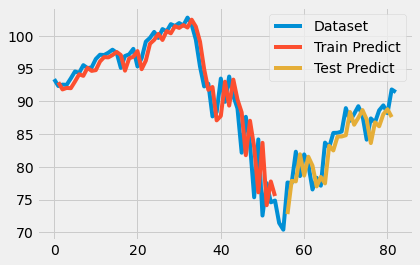

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="Dataset")
plt.plot(trainPredictPlot,label="Train Predict")
plt.plot(testPredictPlot,label="Test Predict")
plt.legend()
plt.show()

In [ ]:
#df = pd.read_csv('S&P500_dataset.csv')
df = pd.read_csv('/content/drive/My Drive/CSCI611-Covid19-Project/S&P500_dataset.csv')

In [ ]:
df_Sp = df
df_Sp.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
559,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
560,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
561,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
562,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000
563,2020-05-01,2869.090088,2869.090088,2821.610107,2830.709961,2830.709961,4753160000


In [ ]:
# Creating new dataframe with the Close stock value column
data = df_Sp.filter(['Close'])
data2 = data.values
# getting the rows for training or model
data_len_train= int(np.ceil( len(data2) * .8 ))
data_len_train

452

In [ ]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler.fit_transform(data2)

scaled_data2

array([[0.35825031],
       [0.39846789],
       [0.38673341],
       [0.29910781],
       [0.33266607],
       [0.36439617],
       [0.37043747],
       [0.40150597],
       [0.42985858],
       [0.43074652],
       [0.4168532 ],
       [0.40385652],
       [0.40614586],
       [0.4438739 ],
       [0.47199147],
       [0.44124494],
       [0.41473791],
       [0.38326008],
       [0.3950817 ],
       [0.42092713],
       [0.42717755],
       [0.42602842],
       [0.43662248],
       [0.4780589 ],
       [0.47496855],
       [0.45955182],
       [0.44577156],
       [0.44390004],
       [0.44797398],
       [0.41394561],
       [0.41744508],
       [0.41308381],
       [0.35368012],
       [0.30542773],
       [0.36661601],
       [0.32663348],
       [0.32000009],
       [0.35122543],
       [0.29987376],
       [0.32822638],
       [0.35455063],
       [0.37035054],
       [0.31953869],
       [0.32710338],
       [0.36515361],
       [0.35237435],
       [0.37135155],
       [0.364

In [ ]:
# create the scaled training data set
train_data = scaled_data2[0:int(data_len_train), :]
# splitting the x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.35825031, 0.39846789, 0.38673341, 0.29910781, 0.33266607,
       0.36439617, 0.37043747, 0.40150597, 0.42985858, 0.43074652,
       0.4168532 , 0.40385652, 0.40614586, 0.4438739 , 0.47199147,
       0.44124494, 0.41473791, 0.38326008, 0.3950817 , 0.42092713,
       0.42717755, 0.42602842, 0.43662248, 0.4780589 , 0.47496855,
       0.45955182, 0.44577156, 0.44390004, 0.44797398, 0.41394561,
       0.41744508, 0.41308381, 0.35368012, 0.30542773, 0.36661601,
       0.32663348, 0.32000009, 0.35122543, 0.29987376, 0.32822638,
       0.35455063, 0.37035054, 0.31953869, 0.32710338, 0.36515361,
       0.35237435, 0.37135155, 0.36465736, 0.38340821, 0.40826115,
       0.4102198 , 0.39671816, 0.37670511, 0.37683581, 0.34573245,
       0.34994559, 0.37391951, 0.37650491, 0.35747564, 0.3633516 ])]
[0.3466986028291619]

[array([0.35825031, 0.39846789, 0.38673341, 0.29910781, 0.33266607,
       0.36439617, 0.37043747, 0.40150597, 0.42985858, 0.43074652,
       0.4168532 , 0.40385652, 0.406

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(392, 60, 1)

In [ ]:
# importing the model and layers 
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compiling hte model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
392/392 [==============================] - 16s 42ms/step - loss: 0.0067


In [ ]:
#Create the testing data set
test_data = scaled_data2[data_len_train - 60: , :]
x_test = []
y_test = data2[data_len_train:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

132.6968408241071

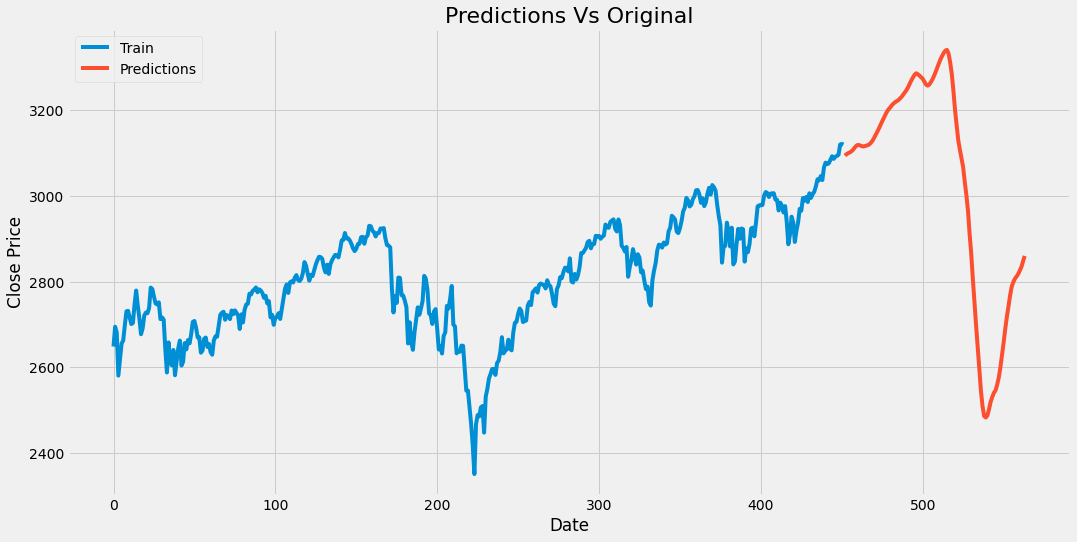

In [ ]:
# Plot the data
train = data[:data_len_train]
valid = data[data_len_train:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Predictions Vs Original',fontsize=22)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[[ 'Predictions']])
plt.legend(['Train', 'Predictions'], loc='upper left')
plt.show()

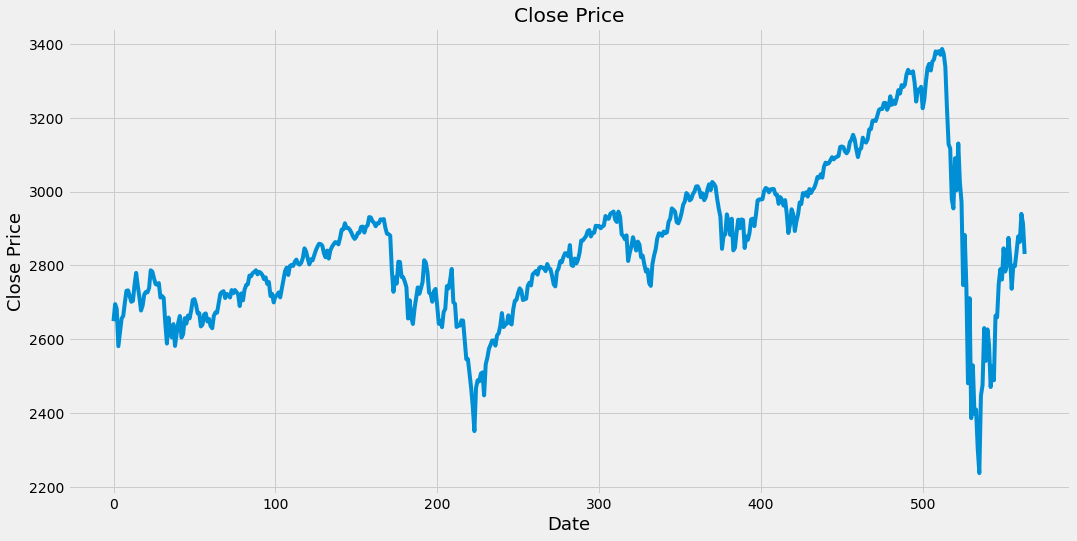

In [ ]:
# Visualizing the original close column for comparision
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()